In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import locale

In [2]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [3]:
raw_df = pd.read_csv('Wasserstand.csv')
raw_df

,Monat,Hoechster Wasserstand,Niedrigster Wasserstand,Durchschnittlicher Wasserstand
0,Jan 1996,437,153,257
1,Feb 1996,422,126,207
2,Mrz 1996,270,129,187
3,Apr 1996,255,147,177
4,Mai 1996,381,144,223
...,...,...,...,...
307,Aug 2021,430,241,335
308,Sep 2021,262,151,193
309,Okt 2021,145,92,121
310,Nov 2021,157,85,112


In [4]:
raw_df.isna().sum()

Monat                             0
Hoechster Wasserstand             0
Niedrigster Wasserstand           0
Durchschnittlicher Wasserstand    0
dtype: int64

### Loading and Cleaning the Dataset

The dataset consist in the average monthly water level since 1996 to 2021. It includes 312 samples. Luckily there are no missing values.

After we loaded the dataset some cleaning is necessary. The headers are renamed and the month column is separated in month and year for an easier groupping later on.

In [5]:
df=raw_df.rename(columns={"Monat": "month", "Hoechster Wasserstand": "max_water_level", "Niedrigster Wasserstand": "min_water_level", "Durchschnittlicher Wasserstand": "avg_water_level"})

In [6]:
# Change locale to parse german date
locale.setlocale(locale.LC_TIME, "de_DE.UTF-8")
raw_df['Monat'] =  pd.to_datetime(raw_df['Monat'], format='%b %Y')

# Change locale again to get UK format
locale.setlocale(locale.LC_TIME, "en_UK.utf8")
df['year'] = raw_df['Monat'].dt.strftime('%Y').astype(int)
df['month'] = raw_df['Monat'].dt.strftime('%B')

In [7]:
# Reordering of the columns
df = df[['year', 'month', 'max_water_level', 'min_water_level', 'avg_water_level']]
df

,year,month,max_water_level,min_water_level,avg_water_level
0,1996,January,437,153,257
1,1996,February,422,126,207
2,1996,March,270,129,187
3,1996,April,255,147,177
4,1996,May,381,144,223
...,...,...,...,...,...
307,2021,August,430,241,335
308,2021,September,262,151,193
309,2021,October,145,92,121
310,2021,November,157,85,112


In [8]:
df.describe()

,year,max_water_level,min_water_level,avg_water_level
count,312.000000,312.000000,312.000000,312.000000
mean,2008.500000,397.955128,190.698718,274.631410
std,7.512048,173.418860,79.821901,110.956041
min,1996.000000,71.000000,25.000000,45.000000
25%,2002.000000,272.750000,133.000000,195.500000
50%,2008.500000,378.000000,183.000000,260.000000
75%,2015.000000,488.500000,239.250000,336.250000
max,2021.000000,933.000000,508.000000,644.000000


### Describing the Data

After cleaning the data it's useful to describe the data to have an understanding about the values that our dataset contains.

The average water level throughout the years is __274.63 cm__. The maximum water level recorded in the last 26 years is __933.00 cm__ that's more than triple of the average level. The lowest level recorded is __25.00 cm__, almost *250 cm* difference from the average level.


In [9]:
df.loc[df['max_water_level'] == 933]

,year,month,max_water_level,min_water_level,avg_water_level
84,2003,January,933,369,549


In [10]:
df.loc[df['min_water_level'] == 25]

,year,month,max_water_level,min_water_level,avg_water_level
273,2018,October,71,25,45


In [11]:
df.loc[df['avg_water_level'] == 644]

,year,month,max_water_level,min_water_level,avg_water_level
264,2018,January,837,426,644


The maximum was recorded on January 2003, with a max water level of __933 cm__ and an average of __549 cm__. The minimum was recorded on October 2018 with a min water level of __25.00 cm__ and an average of __45 cm__. On January 2018 the average water level surpassed the average of January 2003 with a water level of __644 cm__.

### Plotting the Data

In order to visualize and undertand the data better, the values are plotted in different ways:

- A distribution plot is used to understand how the values are distributed.
- A line plot is used to viusualize the relationships between the water level and the month of the year.
- A heat map is used to visualize when the water level is above and below average.


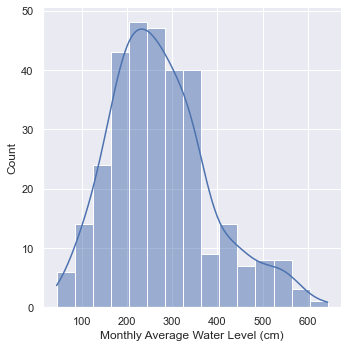

In [12]:
plot = sns.displot(data=df, x='avg_water_level',kde=True)

plot.set(xlabel='Monthly Average Water Level (cm)')

plot.fig.savefig("static/plots/water_level_dis_plot.png") 

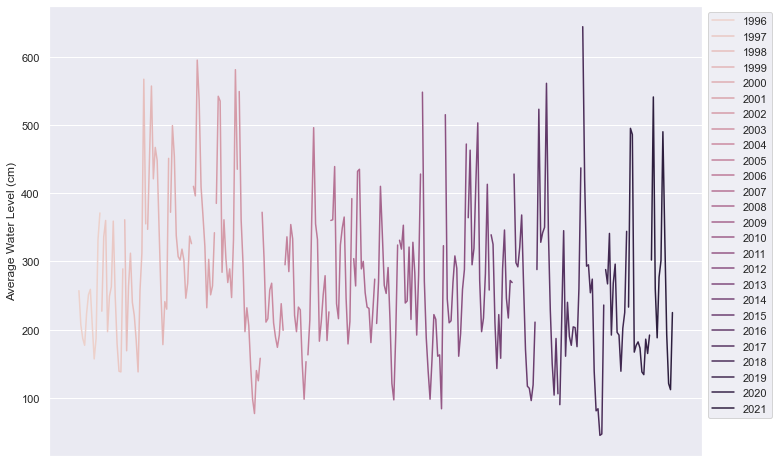

In [13]:
plot = sns.lineplot(data=df, y='avg_water_level',x=df.index.values,hue=df['year'],legend="full")
plot.legend(bbox_to_anchor=(1, 1), loc=2)
plot.set(xticks=[], ylabel='Average Water Level (cm)')
fig = plot.get_figure()
fig.savefig("static/plots/water_level_line_plot_years.png") 

<AxesSubplot:xlabel='month', ylabel='avg_water_level'>

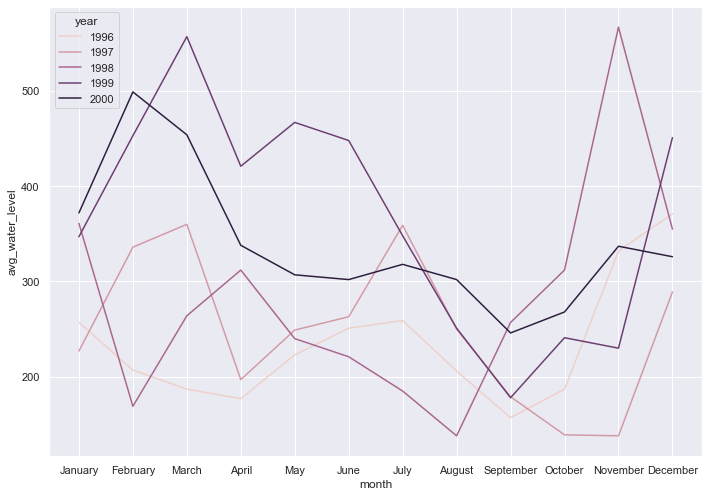

In [14]:
mask=(df['year'] >= 1996) & (df['year'] <= 2000)
plot_df = df.loc[mask]
sns.lineplot(data=plot_df, y='avg_water_level',x='month' ,hue=plot_df['year'])


<AxesSubplot:xlabel='month', ylabel='avg_water_level'>

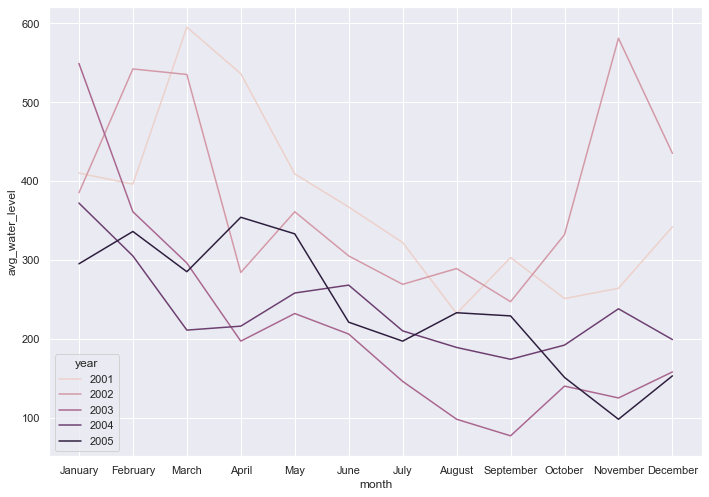

In [15]:
mask=(df['year'] >= 2001) & (df['year'] <= 2005)
plot_df = df.loc[mask]
sns.lineplot(data=plot_df, y='avg_water_level',x='month' ,hue=plot_df['year'])

<AxesSubplot:xlabel='month', ylabel='avg_water_level'>

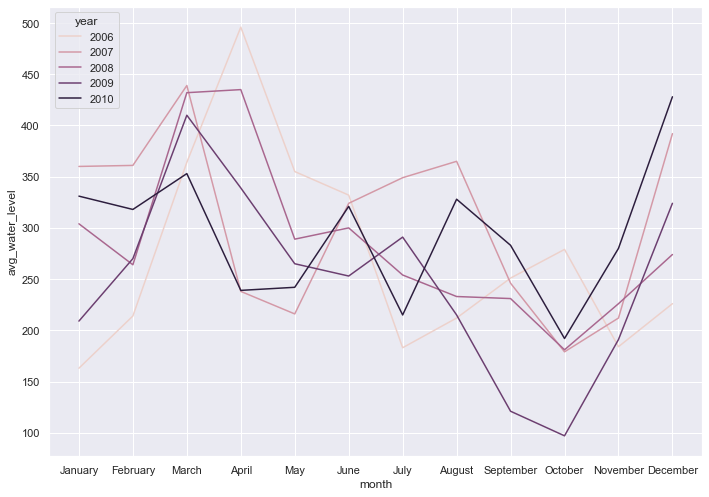

In [16]:
mask=(df['year'] >= 2006) & (df['year'] <= 2010)
plot_df = df.loc[mask]
sns.lineplot(data=plot_df, y='avg_water_level',x='month' ,hue=plot_df['year'])

<AxesSubplot:xlabel='month', ylabel='avg_water_level'>

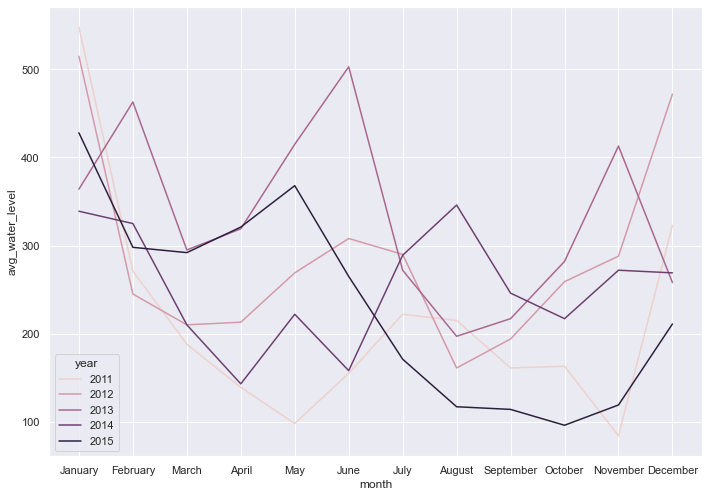

In [17]:
mask=(df['year'] >= 2011) & (df['year'] <= 2015)
plot_df = df.loc[mask]
sns.lineplot(data=plot_df, y='avg_water_level',x='month' ,hue=plot_df['year'])

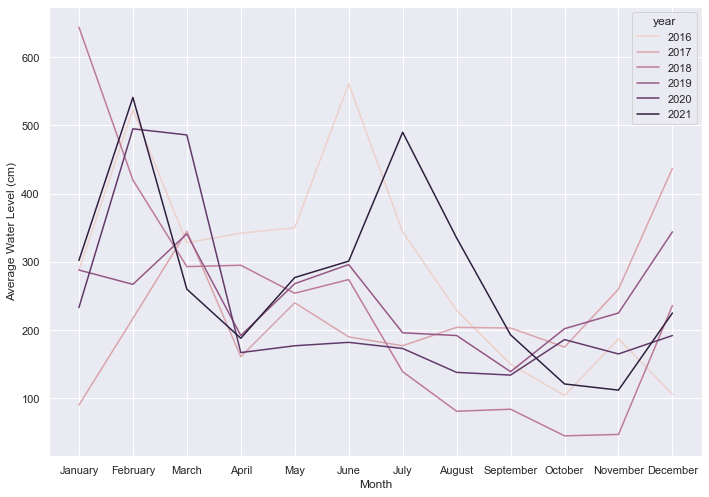

In [18]:
mask=(df['year'] >= 2016) & (df['year'] <= 2021)
plot_df = df.loc[mask]
plot = sns.lineplot(data=plot_df, y='avg_water_level',x='month' ,hue=plot_df['year'])

plot.set(xlabel='Month', ylabel='Average Water Level (cm)')
fig = plot.get_figure()
fig.savefig("static/plots/water_level_line_plot.png") 

The water level varies from year to year but it can be rougly said that the water level starts sinking in the beginning of July and reaches its lower point around October.

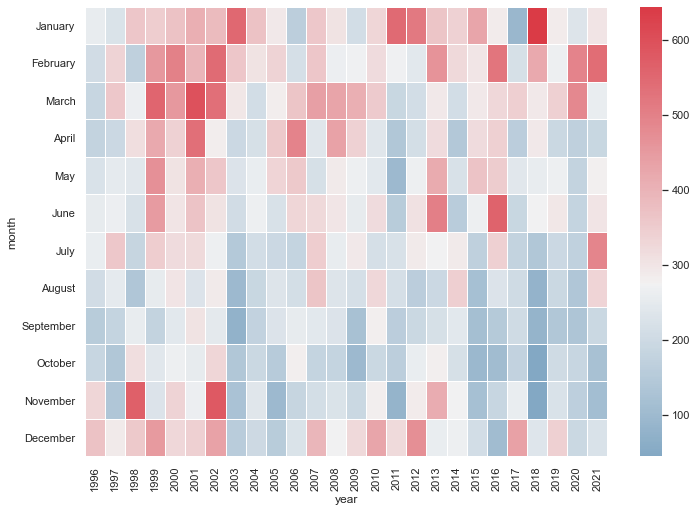

In [19]:
avg_level = df.pivot("month", "year", "avg_water_level")

avg_level.index = pd.CategoricalIndex(avg_level.index, categories= ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"])
avg_level.sort_index(level=1, inplace=True)


plot = sns.heatmap(avg_level,linewidths=.5, cmap=sns.diverging_palette(240, 10, as_cmap=True),vmin=45,vmax=644,center=274)
fig = plot.get_figure()
fig.savefig("static/plots/water_level_heat_map.png") 